In [46]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Задача 8-1.
Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов:
- Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.
- Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.
- Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

## Решение:
[1] Сформулируем нулевую и альтернативную гипотезы:
- Гипотеза $H_0$: средний рост спорстменов не зависит от спортивной дисциплины ($\mu_1 = \mu_2 = \mu_3$).

- Гипотеза $H_1$: средний рост спорстменов зависит от спортивной дисциплины ($\mu_1\ne\mu_2\ne\mu_3$).

[2] Для удобства дальнейших расчетов введем следующий нейминг групп спортсменов:
- Футболисты - football players = fp
- Хоккеисты - hockey players = hp
- Штангисты - power lifters = pl

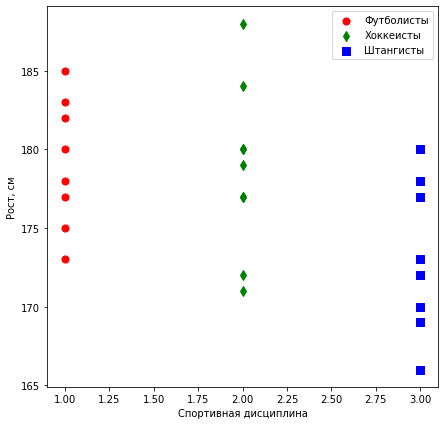

In [75]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 7]
x1 = [1] * len(fp)
y1 = fp
x2 = [2] * len(hp)
y2 = hp
x3 = [3] * len(pl)
y3 = pl
plt.scatter(x1, y1, marker = 'o',color = 'r', s = 50 ,label = 'Футболисты')
plt.scatter(x2, y2, marker = 'd',color = 'g', s = 50 ,label = 'Хоккеисты')
plt.scatter(x3, y3, marker = 's',color = 'b', s = 50 ,label = 'Штангисты')
plt.legend(loc = 'best')
plt.xlabel('Спортивная дисциплина')
plt.ylabel('Рост, см')
plt.show()

[3] Выведем количество измерений в каждой выборке и общее количество измерений:
$$n = \sum\limits_{i=1}^{k}n_i\;\;\;\;\;\;\;\;\;\;\;\;\;\;(1),$$
где $n_i$ общее число измерений

[4] Вычислим средние значения по каждой выборке $(\mathrm{\overline{fp}}, \mathrm{\overline{hp}}\;и\; \mathrm{\overline{pl}})$ и общее среденее по всем выборкам $(\mathrm{\overline Y})$ с помощью формул:
$$\overline{y}_{i} = \frac{1}{n_i}\sum\limits_{j=1}^{n_i}y_{ij}\;\;\;\;\;\;\;\;\;\;\;\;\;\;(2),$$
где $\overline{y}_{i}$ — среднее значение переменной Y на i-м уровне
$$\overline{Y} = \frac{1}{n}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}y_{ij} = \frac{1}{n}\sum\limits_{i=1}^{k}\overline{y}_{i}n_{i}\;\;\;\;\;\;\;\;\;\;\;\;\;\;(3),$$
где $\overline{Y}$ — среднее значение переменной **Y** по всем значениям

In [26]:
fp = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hp = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
pl = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

n_fp = fp.shape[0]
n_hp = hp.shape[0]
n_pl = pl.shape[0]
n_all = len(height)
print(f'Количество измерений:')
print(f' - для футболистов n_fp = {n_fp}')
print(f' - для хоккеистов n_hp = {n_hp}')
print(f' - для штангистов n_pl = {n_pl}')
print(f'Количество измерений по всем выборкам: N = {n_all}')

fp_mean = fp.mean()
hp_mean = hp.mean()
pl_mean = pl.mean()
height = np.concatenate([fp, hp, pl])
height_mean = height.mean()
print(f'Cреднее значение роста равно:')
print(f' - для футболистов fp = {round(fp_mean, 3)}')
print(f' - для хоккеистов hp = {round(hp_mean, 3)}')
print(f' - для штангистов pl = {round(pl_mean, 3)}')
print(f'Cреднее значение по всем наблюдениям: Y = {round(height_mean, 3)}')

Количество измерений:
 - для футболистов n_fp = 8
 - для хоккеистов n_hp = 9
 - для штангистов n_pl = 11
Количество измерений по всем выборкам: N = 28
Cреднее значение роста равно:
 - для футболистов fp = 179.125
 - для хоккеистов hp = 178.667
 - для штангистов pl = 172.727
Cреднее значение по всем наблюдениям: Y = 176.464


[5] Вычислим суммы квадратов используя следующие формулы:
$$S^2 = \sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}({y}_{ij} - \overline{Y})^2\;\;\;\;\;\;\;\;\;\;\;\;\;\;(4),$$
где $S^2$ — сумма квадратов отклонений наблюдений от общего среднего
$$S_F^2 = \sum\limits_{i=1}^{k}(\overline{y}_i - \overline{Y})^2n_i\;\;\;\;\;\;\;\;\;\;\;\;\;\;(5),$$
где $S_F^2$ — сумма квадратов отклонений средних групповых значений от общего среднего значения $\overline{Y}$
$$S_{rest}^{2} = \sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y}_i)^2\;\;\;\;\;\;\;\;\;\;\;\;\;\;(6),$$
где $S_{rest}^2$ — остаточная сумма квадратов отклонений



In [27]:
S2 = ((height - height_mean) ** 2).sum()
S2_F = n_fp * (fp_mean - height_mean) ** 2 + n_hp * (hp_mean - height_mean) ** 2 + n_pl * (pl_mean - height_mean) ** 2
S2_rest = ((fp - fp_mean)**2).sum() + ((hp - hp_mean) ** 2).sum() + ((pl - pl_mean) ** 2).sum()
print(f'Сумма квадратов отклонений наблюдений от общего среднего: 𝑆2 = {round(S2, 3)}')
print(f'Сумма квадратов отклонений средних групповых от общего среднего: 𝑆2_𝐹 = {round(S2_F, 3)}')
print(f'Остаточная сумма квадратов отклонений: 𝑆2_𝑟𝑒𝑠𝑡 = {round(S2_rest, 3)}')

Сумма квадратов отклонений наблюдений от общего среднего: 𝑆2 = 830.964
Сумма квадратов отклонений средних групповых от общего среднего: 𝑆2_𝐹 = 253.907
Остаточная сумма квадратов отклонений: 𝑆2_𝑟𝑒𝑠𝑡 = 577.057


[6] Проверим правильность вычислений сопоставлением сумм квадратов отклонений:

Cумма квадратов отклонений наблюдений от общего среднего дожна быть равна:
$$S^2 = S_F^2 + S_{rest}^2\;\;\;\;\;\;\;\;\;\;\;\;\;\;(7)$$

In [28]:
print(f'𝑆2 = {round(S2_F, 3)} + {round(S2_rest, 3)} = {S2_F + S2_rest}')
a = round((S2_F + S2_rest), 7)
b = round(S2, 7)
if a == b:
    print(f'Расчеты верны: {a} = {b}')
else:
    print(f'Расчетное значение ≠ найденному по формуле: {S2_F + S2_rest} ≠ {S2}')

𝑆2 = 253.907 + 577.057 = 830.964285714286
Расчеты верны: 830.9642857 = 830.9642857


[5] Согласно условию, переменная $\mathbf{\color{magenta}{height}}$ имеет $k=3$ выборок, а общее число наблюдений $n=28$.

Вычислим значения дисперсий:
$$\sigma_{common}^{2} = \frac{S^2}{n - 1} = \frac{1}{n-1}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{Y})^2\;\;\;\;\;\;\;\;\;\;\;\;\;\;(8),$$
где $\sigma_{common}^{2}$ — общая дисперсия
$$\sigma_{F}^{2} = \frac{S_{F}^{2}}{k-1} = \frac{1}{k-1}\sum\limits_{i=1}^{k}(\overline{y}_i - \overline{Y})^{2}n_i\;\;\;\;\;\;\;\;\;\;\;\;\;\;(9),$$
где $\sigma_{F}^{2}$ — факторная дисперсия
$$\sigma_{rest}^{2} = \frac{S_{rest}^{2}}{n - k} = \frac{1}{n - k}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y}_i)^2\;\;\;\;\;\;\;\;\;\;\;\;\;\;(10),$$
где $\sigma_{𝑟𝑒𝑠𝑡}^{2}$ — остаточная дисперсия

In [29]:
k = 3
sig2_comm = S2 / (n_all -1)
sig2_F = S2_F / (k - 1)
sig2_rest = S2_rest / (n_all - k)
print(f'Общая дисперсия: 𝜎2_𝑐𝑜𝑚𝑚𝑜𝑛= {round(sig2_comm, 3)}')
print(f'Факторная дисперсия: 𝜎2_𝐹 = {round(sig2_F, 3)}')
print(f'Остаточная дисперсия: 𝜎2_𝑟𝑒𝑠𝑡 = {round(sig2_rest, 3)}')

Общая дисперсия: 𝜎2_𝑐𝑜𝑚𝑚𝑜𝑛= 30.776
Факторная дисперсия: 𝜎2_𝐹 = 126.954
Остаточная дисперсия: 𝜎2_𝑟𝑒𝑠𝑡 = 23.082


[7] Рассчитаем значение критерия Фишера-Снедекора $F_H$:
$$F_H = \frac{\sigma_{F}^{2}}{\sigma_{ост}^{2}}\;\;\;\;\;\;\;\;\;\;\;\;\;\;(11),$$
где $F_H$ — критерий Фишера-Снедекора

In [41]:
F_H = sig2_F / sig2_rest
print(f' Рассчетное значение критерия Фишера-Снедекора 𝐹_𝐻 = {round(F_H, 5)}')

 Рассчетное значение критерия Фишера-Снедекора 𝐹_𝐻 = 5.50005


[8] Проверим правильность расчета $F_H$ с помощью функции $\mathbf{\color{green}{stats.f\_oneway}}$ из пакета $\mathbf{\color{darkblue}{scipy}}$:

In [38]:
stats.f_oneway(fp, hp, pl)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

Расчет $F_H$ произведен верно.

[9] Найдем $F_{crit}$ из таблицы критических точек распределения Фишера-Снедекора для заданного уровня значимости $\alpha=0.05$ двух степеней свободы $df_{inter} = k - 1=3-1=2$ (относится к числителю соотношения) и $df_{inner} = n - k=28-3=25$ (относится к знаменателю):

$F_{crit}=5.57$

[10] Сравним значения $F_H$ и $F_{crit}$:

In [ ]:
#ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )
#ax.set_xlim(0, 4)

$F_H=5.50$ меньше $F_{crit}=5.57$, следовательно верна нулевая гипотеза $H_0$: средний рост спорстменов не зависит от спортивной дисциплины ($\mu_1 = \mu_2 = \mu_3$).

## Ответ 8-1:
### Верна нулевая гипотеза $H_0$: средний рост спорстменов не зависит от спортивной дисциплины ($\mu_1 = \mu_2 = \mu_3$).